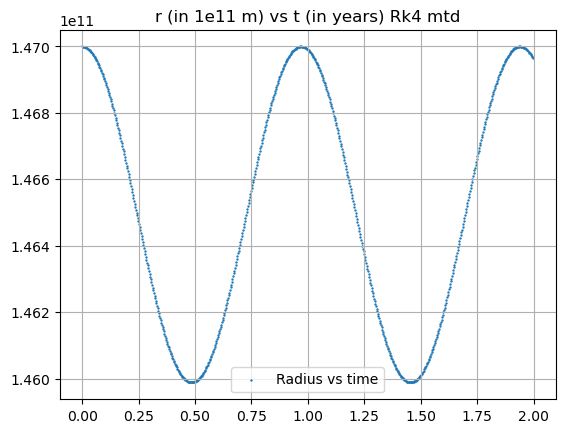

PyObject Text(0.5, 1.0, 'r (in 1e11 m) vs t (in years) Rk4 mtd')

In [7]:
using PyPlot

#deining the constants
G=6.6743e-11
M=1.9891e30
r0=1.47e11
m=5.9722e24
v0=30e3
L0=m*v0*r0

#defing the total energy
E=(1/2)*m*abs2(v0)-G*M*m/r0

#defining the function to solve the equations using rK4 method
function rk4(f1, x, y, h)
    k1 = h*f1(x, y)
    k2 = h*f1(x+h/2, y+k1/2)
    k3 = h*f1(x+h/2, y+k2/2)
    k4 = h*f1(x+h, y+k3)
    return y + (k1+2*k2+2*k3+k4)/6
end


#year and h converted to seconds
year=31536000
z0=year
h=86400

#function to return d2y/dt2,y[1],momentum
function kepler(x,y)
    r=y[2]
    dr=y[1]
    j=[-(G*M*z0^2)/((r0^3)*(r^2))+(((v0^2)*z0^2)/((r0^2)*r^3)),dr,L0/(m*(r0*r)^2)]
    
    return j
end

#function returning the potential
function angularandpotential(x)
    L0^2/(2*m*x^2)-(G*M*m)/x
end


function radial(x)
    (m/2)*x^2
end

ys=[[],[],[]]

#general function to solve the the differential equation using rk4 method
function solve(mtd,ys,f)
    y0=[0.0,1.0,0.0]
    h=0.00274
    xs=range(0,stop=2,step=0.00274)
    N=length(xs)
    y=y0
    append!(ys[1],y0[1])
    append!(ys[2],y0[2])
    append!(ys[3],y0[3])
    for i=2:N
        x=xs[i]
        y=mtd(f,x,y,h)
        append!(ys[1],y[1])
        append!(ys[2],y[2])
        append!(ys[3],y[3])
        if y[2]<=1.4e6*(1/r0)
            break
        end
    end
    return xs,ys
end


xs,ys=solve(rk4,ys,kepler)

# dr/dt is stored in ys[1] and r is stored in y[2] in dimensionless form, we can use the values to find the energy

ys[1]=(r0/z0)*ys[1] #converting back to usual units
ys[2]=r0*ys[2]
ys[3]=z0*ys[3]

#plotting the the radius vs time graph obtained for rK4 method
p=scatter(xs,ys[2],label="Radius vs time",s=0.5)
legend()
PyPlot.grid("on")
title("r (in 1e11 m) vs t (in years) Rk4 mtd")


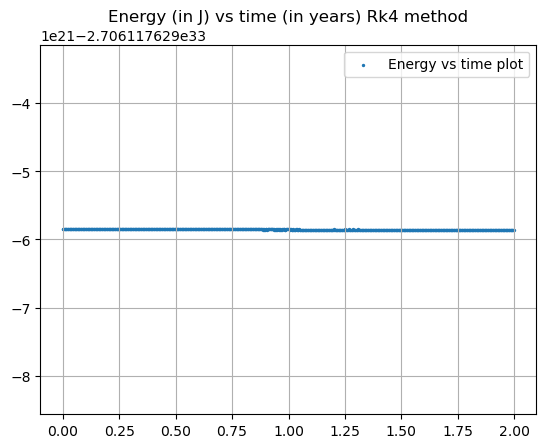

PyObject Text(0.5, 1.0410353535353536, 'Energy (in J) vs time (in years) Rk4 method')

In [8]:
#plotting the energy vs time graph for Rk4 method
z=angularandpotential.(ys[2])+radial.(ys[1])
q=scatter(xs,z,label="Energy vs time plot",s=2.0)
legend()
PyPlot.grid("on")
title("Energy (in J) vs time (in years) Rk4 method")

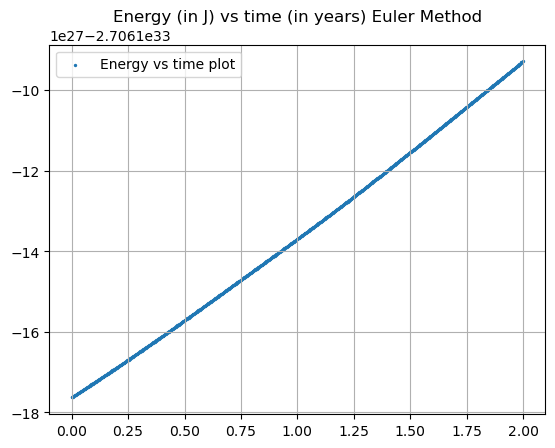

PyObject Text(0.5, 1.0410353535353536, 'Energy (in J) vs time (in years) Euler Method')

In [9]:
ys=[[],[],[]]

#defining the Euler function
function euler(f1,x,y,h)
    y+h*f1(x,y)
end


xs,ys=solve(euler,ys,kepler)

# dr/dt is stored in ys[1] and r is stored in y[2] in dimensionless form, we can use the values to find the energy
ys[1]=(r0/z0)*ys[1] #converting back to usual units
ys[2]=r0*ys[2]
ys[3]=z0*ys[3]



#plotting the Energy vs time graph using Euler method
z=angularandpotential.(ys[2])+radial.(ys[1])
q=scatter(xs,z,label="Energy vs time plot",s=2.0)
legend()
PyPlot.grid("on")
title("Energy (in J) vs time (in years) Euler Method")

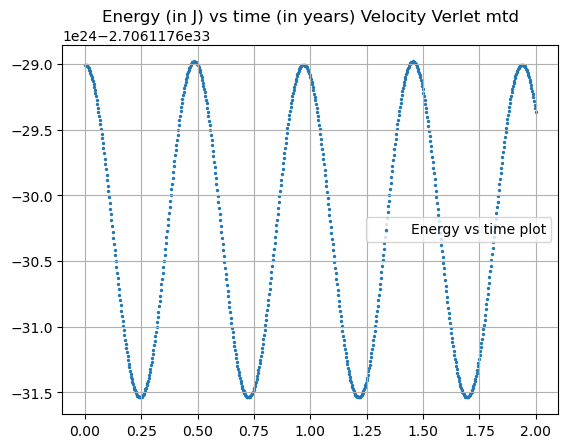

PyObject Text(0.5, 1.0410353535353536, 'Energy (in J) vs time (in years) Velocity Verlet mtd')

In [10]:
M=1.9891e30
r0=1.47e11
m=5.9722e24
v0=30e3
L0=m*v0*r0
α=-G*M*m
E=(1/2)*m*v0^2-G*M*m/r0
e=sqrt(abs(1+(2*E*L0^2)/(m*α^2)))
year=31536000
z0=year



function kepler_vverlet(x,y)
    val=-(G*M*z0^2)/((r0^3)*(y^2))+(((v0^2)*z0^2)/((r0^2)*y^3))
    #println(val)
    return val
end


#defining the function for the velocity verlet method
function velocity_verlet(f1, x, yn, vn, h)
    ynp1 = yn + vn*h + f1(x, yn)*h^2/2;
    vnp1 = vn + (f1(x, yn)+f1(x+h, ynp1))*h/2;
    #println(ynp1,vnp1)
    return ynp1, vnp1
end
ys1=[]
vs1=[]
yv0=1
vv0=0

#defining the function to solve the differential equation using velocity verlet method
function solve_general(mtd,f,ys1,vs1)
    xs=range(0,stop=2,step=1/365)
    N=length(xs)
    append!(ys1,yv0)
    append!(vs1,vv0)
    y=yv0
    v=vv0
    for i=2:N
        x=xs[i]
        y,v=mtd(f,x,y,v,1/365)
        append!(ys1,y)
        append!(vs1,v)
    end
    return xs,ys1,vs1
end

#calling the function with the required parameters
xs,ys1,vs1=solve_general(velocity_verlet,kepler_vverlet,ys1,vs1)
ys1=r0*ys1
vs1=(r0/z0)*vs1




z=angularandpotential.(ys1)+radial.(vs1)
q=scatter(xs,z,label="Energy vs time plot",s=2.0)
legend()
PyPlot.grid("on")

title("Energy (in J) vs time (in years) Velocity Verlet mtd")


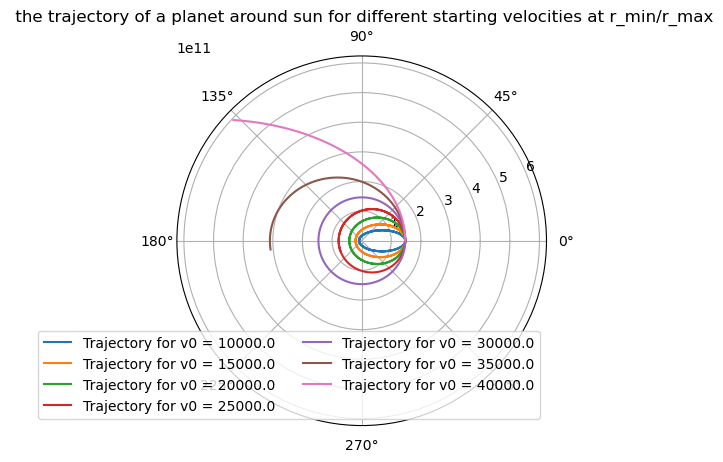

PyObject Text(0.5, 1.0715488215488216, ' the trajectory of a planet around sun for different starting velocities at r_min/r_max')

In [14]:
start=10e3
stop=40e3
v_s=range(start,stop=stop,step=5e3)

function solve(mtd,ys,f)
    # Define initial conditions
    y0=[0.0,1.0,0.0]
    h=0.00274/24
    xs=range(0,stop=1,step=0.00274/24)
    N=length(xs)
    y=y0
    # Append initial conditions to ys
    append!(ys[1],y0[1])
    append!(ys[2],y0[2])
    append!(ys[3],y0[3])
    # Loop through N steps
    for i=2:N
        x=xs[i]
        y=mtd(f,x,y,h)
        append!(ys[1],y[1])
        append!(ys[2],y[2])
        append!(ys[3],y[3])
        # Check if y2 is less than or equal to 1.4e6*(1/r0)
        if y[2]<=1.4e6*(1/r0)
            break
        end
    end
    # Return xs and ys
    return xs,ys
end

# Initialize counter i
i=1

# Loop through v_s
for k in v_s
    # Set v0 and L0
    v0=k
    L0=m*v0*r0
    # Initialize ys
    ys=[[],[],[]]
    # Call solve function
    xs,ys=solve(rk4,ys,kepler)
    # Convert ys back to usual units
    ys[1]=(r0/z0)*ys[1] 
    ys[2]=r0*ys[2]
    ys[3]=z0*ys[3]
    # Plot polar graph with label "Trajectory for v0 = [value of v0]"
    p=polar(ys[3],ys[2],label="Trajectory for v0 = "*string(v0))
    # Increment counter i
    i=i+1
end
# Add legend to the graph
legend(loc="lower right",ncol=2)
# Add title to the graph
title(" the trajectory of a planet around sun for different starting velocities at r_min/r_max")


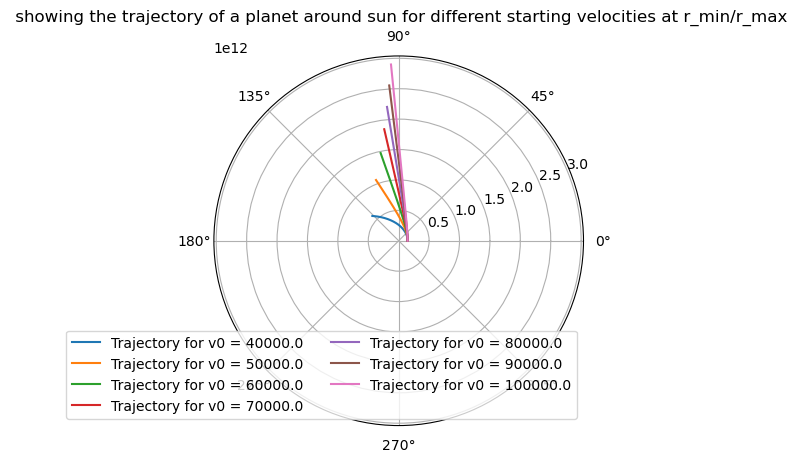

PyObject Text(0.5, 1.0715488215488216, ' showing the trajectory of a planet around sun for different starting velocities at r_min/r_max')

In [12]:
start=40e3
stop=100e3
v_s=range(start,stop=stop,step=10e3)


function solve(mtd,ys,f)
    y0=[0.0,1.0,0.0]
    h=0.00274/24
    xs=range(0,stop=1,step=0.00274/24)
    N=length(xs)
    y=y0
    append!(ys[1],y0[1])
    append!(ys[2],y0[2])
    append!(ys[3],y0[3])
    for i=2:N
        x=xs[i]
        y=mtd(f,x,y,h)
        append!(ys[1],y[1])
        append!(ys[2],y[2])
        append!(ys[3],y[3])
        if y[2]<=1.4e6*(1/r0)
            break
        end
    end
    return xs,ys
end


i=1


for k in v_s
    v0=k
    L0=m*v0*r0
    ys=[[],[],[]]
    xs,ys=solve(rk4,ys,kepler)
    ys[1]=(r0/z0)*ys[1] #converting back to usual units
    ys[2]=r0*ys[2]
    ys[3]=z0*ys[3]
    p=polar(ys[3],ys[2],label="Trajectory for v0 = "*string(v0))
    i=i+1
end


legend(loc="lower right",ncol=2)
title(" showing the trajectory of a planet around sun for different starting velocities at r_min/r_max")

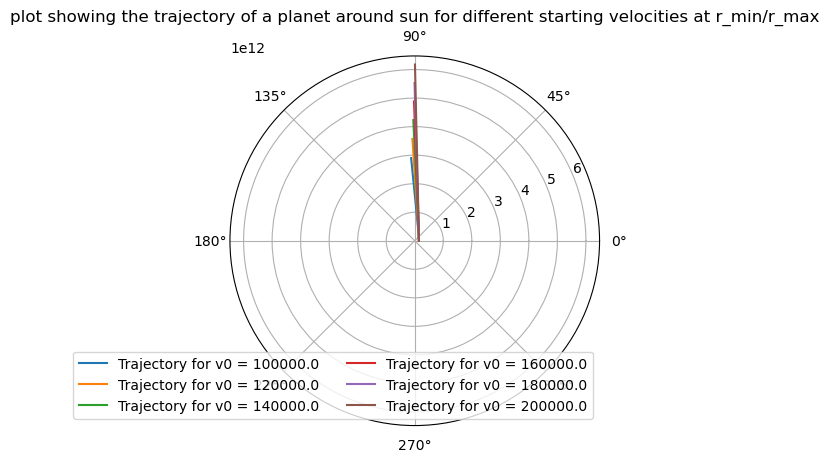

PyObject Text(0.5, 1.0715488215488216, 'plot showing the trajectory of a planet around sun for different starting velocities at r_min/r_max')

In [13]:
start=100e3
stop=200e3
v_s=range(start,stop=stop,step=20e3)


function solve(mtd,ys,f)
    y0=[0.0,1.0,0.0]
    h=0.00274/24
    xs=range(0,stop=1,step=0.00274/24)
    N=length(xs)
    y=y0
    append!(ys[1],y0[1])
    append!(ys[2],y0[2])
    append!(ys[3],y0[3])
    for i=2:N
        x=xs[i]
        y=mtd(f,x,y,h)
        #print(xs[i],"\t",y[1],"\t",y[2],"\n")
        append!(ys[1],y[1])
        append!(ys[2],y[2])
        append!(ys[3],y[3])
        if y[2]<=1.4e6*(1/r0)
            break
        end
    end
    return xs,ys
end


i=1


for k in v_s
    v0=k
    L0=m*v0*r0
    ys=[[],[],[]]
    xs,ys=solve(rk4,ys,kepler)
    ys[1]=(r0/z0)*ys[1] #converting back to usual units
    ys[2]=r0*ys[2]
    ys[3]=z0*ys[3]
    p=polar(ys[3],ys[2],label="Trajectory for v0 = "*string(v0))
    i=i+1
end


legend(loc="lower right",ncol=2)
title("plot showing the trajectory of a planet around sun for different starting velocities at r_min/r_max")